In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.stats import norm
import xlrd
# import style

In [2]:
#import data
data = pd.read_excel('../data/10YR.xls')
df = pd.DataFrame(data, columns=['Date', 'Ten_Yr'])
df = df.set_index('Date')

In [3]:
#log returns
log_returns = np.log(1 + df.pct_change())
#plt.plot(log_returns)
#plt.plot(df)
#plt.show()

In [4]:
#GBM
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

In [5]:
type(drift)
type(stdev)

pandas.core.series.Series

In [6]:
np.array(drift)
drift.values
stdev.values
norm.ppf(0.95)

1.6448536269514722

In [7]:
x = np.random.rand(10,2)
norm.ppf(x)

array([[ 1.55941272, -1.30751426],
       [-0.49676156,  1.78831422],
       [ 0.40541933, -0.52912074],
       [ 0.77972019, -1.17178296],
       [-1.3493111 ,  2.78074308],
       [ 2.15939827,  0.4140784 ],
       [ 1.13767119, -0.61012307],
       [-1.26841755,  0.73158285],
       [-0.71051   ,  0.02741395],
       [ 0.29880886, -1.71971245]])

In [8]:
z = norm.ppf(np.random.rand(10,2))

In [9]:
#set parameters 
t_intervals = 500
iterations = 50

In [10]:
daily_yield = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [11]:
S0 = df.iloc[-1]

In [12]:
yield_list = np.zeros_like(daily_yield)
yield_list[0]
yield_list[0] = S0

In [13]:
for t in range(1, t_intervals):
    yield_list[t] = yield_list[t-1] * daily_yield[t] 
    #print(yield_list)

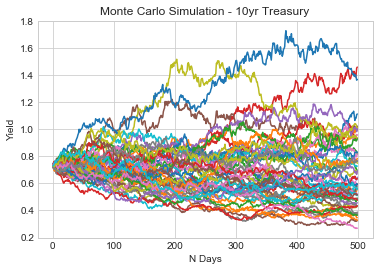

In [14]:
plt.style.use("seaborn-whitegrid")
plt.plot(yield_list)
plt.title("Monte Carlo Simulation - 10yr Treasury")
plt.xlabel("N Days")
plt.ylabel("Yield")
plt.show()

In [15]:
#averages
print(np.median(yield_list))
print(yield_list.mean())

0.6934864054122185
0.7048556601661675
